<a href="https://colab.research.google.com/github/XuRui314/CS228-PGM/blob/main/CS_228_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive")
!ls

 Advertising.csv		     iris_analysis
 AI				     kaggle
'Colab Notebooks'		     kaggle.json
 CS228				     Pytorch-implementation-for-OCSGA
 dataset			     results_per_run.json
'E-Commerce Data | Kaggle (1).png'   Test-Models
'E-Commerce Data | Kaggle.png'	     TomBERT
 exploiting-BERT-thru-translation    UMT


In [3]:
# 第一次运行才要下载
# !git clone https://github.com/scheeloong/CS228.git

In [4]:
# 设置第一次作业的工作区
import os
os.chdir("/content/drive/MyDrive/CS228/pa1")
!ls

a4.png		      CORRECTa6Real.png     ps1
a5.png		      CORRECTa7.png	    q6.mat
a6_hist_corrupt.png   FinalP1.pdf	    q7.mat
a6_hist_real.png      hw1.pdf		    test.rtc
CORRECTa4.png	      P1.tex		    trained_mnist_model
CORRECTa5.png	      pa1.py		    W1HW.txt
CORRECTa6Corrupt.png  Problem7BayesNet.JPG


In [5]:
"""
CS 228: Probabilistic Graphical Models
Winter 2017
Programming Assignment 1: Bayesian Networks
Author: Aditya Grover
"""

import numpy as np 
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat

def plot_histogram(data, title='histogram', xlabel='value', ylabel='frequency', savefile='hist'):
  '''
  Plots a histogram.
  '''

  plt.figure()
  plt.hist(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.savefig(savefile, bbox_inches='tight')
  plt.show()
  plt.close()

  return



def get_p_z1(z1_val):
  '''
  Computes the prior probability for variable z1 to take value z1_val.
  '''

  return bayes_net['prior_z1'][z1_val]

def get_p_z2(z2_val):
  '''
  Computes the prior probability for variable z2 to take value z2_val.
  '''

  return bayes_net['prior_z2'][z2_val]

def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
  '''
  Computes the conditional likelihood of variable xk assumes value 1 
  given z1 assumes value z1_val and z2 assumes value z2_val. 
  '''

  return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]

def get_p_x_cond_z1_z2(z1_val, z2_val):
  '''
  TODO
  '''
  pass

def get_pixels_sampled_from_p_x_joint_z1_z2():
  
  '''
  TODO. Note that this function should only return the sampled values of pixel variables.
  '''



  return ans

def get_conditional_expectation(data):
  '''
  TODO
  '''
  pass

def q4():
  '''
  Plots the pixel variables sampled from the joint distribution as 28 x 28 images. Rest is TODO.
  '''


  return

def q5():
  '''
  Plots the expected images for each latent configuration on a 2D grid. Rest is TODO.
  '''


  return

def q6():
  '''
  Loads the data and plots the histograms. Rest is TODO.
  '''

  mat = loadmat('q6.mat')
  val_data = mat['val_x']
  test_data = mat['test_x']

  '''
  TODO
  '''

  return

def q7():
  '''
  Loads the data and plots a color coded clustering of the conditional expectations. Rest is TODO.
  '''

  mat = loadmat('q7.mat')
  data = mat['x']
  labels = mat['y']

  
  return

def load_model(model_file):
  '''
  Loads a default Bayesian network with latent variables (in this case, a variational autoencoder)
  '''

  with open('trained_mnist_model', 'rb') as infile:
    cpts = pkl.load(infile, encoding='bytes')

  model = {}
  model['prior_z1'] = cpts[0]
  model['prior_z2'] = cpts[1]
  model['cond_likelihood'] = cpts[2]

  return model

def main():

  global disc_z1, disc_z2
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  
  q4()
  return
  q5()
  q6()
  q7()

  return

if __name__== '__main__':

  main()

## Start

上面留了一份初始版，要是你想自己写一版可以直接用 :)

Problem 9: Programming assignment (35 points)
In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28(784)$ pixels. Consider the Bayesian network in Figure 1. The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image and are referred to as manifest variables. The variables in the top layer, $Z_1$ and $Z_2$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

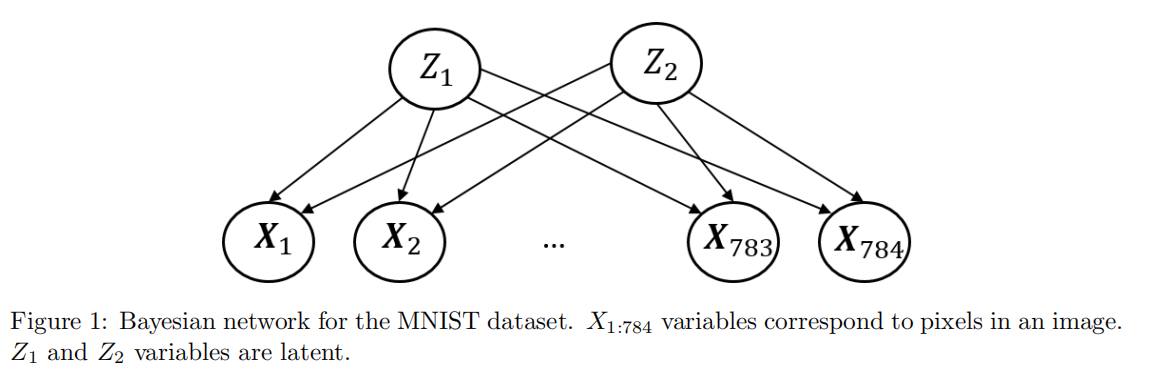



The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_1, Z_2, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_1, z_2} p\left(z_1, z_2, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. We consider a model parameterized using neural networks, trained using stochastic gradient descent. Bayesian networks specified as such are popularly referred to as variational autoencoders and represent one of the most powerful existing deep generative models in current use. We will return to the exact details of learning such models later in the course.

For this programming assignment, we provide a pretrained model trained_mnistmodel. The starter code pa1.py loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_1\right)=\operatorname{Val}\left(Z_2\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_j\right)=\{0,1\}$, i.e., the image is binary.
1. (2 points) How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?
  
  Ans: $2^{784}$

2. (2 points) How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images?

  Ans: $2^{784} - 1$
3. (4 points) How many parameters do you need to specify the Bayesian network in Figure 1?

  Ans: $784 * 25 * 25 + 25 * 2 - 1$  Hint: Z can take 25 different vals.


### Q4

For parts 4-7 below, refer to pa1.py. The starter code contains some helper functions for solving these questions. It is not compulsory to use them and you are allowed to use your own implementations, nor are the helper functions sufficient so feel free to introduce your own functions if required.
4. (5 points) Produce 5 samples from the joint probability distribution $\left(z_1, z_2, x_{1: 784}\right) \sim p\left(Z_1, Z_2, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables).
Hint: they should look like (binarized) handwritten digits. Imagine we could build such a model not for handwritten digits, but for Renaissance paintings. Each sample from the model would produce a new piece of art!


首先是第四问，从这个联合分布里面sample 5个值，然后生成图片，首先还是分析一波代码：

In [ ]:
bayes_net['prior_z1']

{-2.75: 0.002277329186428999,
 -2.5: 0.0043896668984809055,
 2.0: 0.013521125941838642,
 3.0: 0.0011098816043293872,
 0.0: 0.09990835810495223,
 1.0: 0.060597482352202706,
 -0.5: 0.08816881656993292,
 -0.75: 0.07541478526731736,
 0.5: 0.08816881656993292,
 0.75: 0.07541478526731736,
 1.5: 0.03243549496849432,
 -1.25: 0.04574137946027258,
 1.75: 0.02160669773326762,
 -1.5: 0.03243549496849432,
 1.25: 0.04574137946027258,
 -1.75: 0.02160669773326762,
 2.5: 0.0043896668984809055,
 2.25: 0.00794865988767476,
 -2.25: 0.00794865988767476,
 2.75: 0.002277329186428999,
 -2.0: 0.013521125941838642,
 -0.25: 0.09683450107728372,
 -3.0: 0.0011098816043293872,
 -1.0: 0.060597482352202706,
 0.25: 0.09683450107728372}

In [ ]:
# 验证一下确实是概率
q4_sum = 0
for value in bayes_net['prior_z1'].values():
  q4_sum += value
q4_sum

1.0

In [ ]:
bayes_net['prior_z2']

{-2.75: 0.002277329186428999,
 -2.5: 0.0043896668984809055,
 2.0: 0.013521125941838642,
 3.0: 0.0011098816043293872,
 0.0: 0.09990835810495223,
 1.0: 0.060597482352202706,
 -0.5: 0.08816881656993292,
 -0.75: 0.07541478526731736,
 0.5: 0.08816881656993292,
 0.75: 0.07541478526731736,
 1.5: 0.03243549496849432,
 -1.25: 0.04574137946027258,
 1.75: 0.02160669773326762,
 -1.5: 0.03243549496849432,
 1.25: 0.04574137946027258,
 -1.75: 0.02160669773326762,
 2.5: 0.0043896668984809055,
 2.25: 0.00794865988767476,
 -2.25: 0.00794865988767476,
 2.75: 0.002277329186428999,
 -2.0: 0.013521125941838642,
 -0.25: 0.09683450107728372,
 -3.0: 0.0011098816043293872,
 -1.0: 0.060597482352202706,
 0.25: 0.09683450107728372}

可以看到bayes_net其实用字典的形式存了z1和z2的marginal概率，还有x1-x784的conditional distribution，$P(x_i | z_1, z_2)$，但是因为太多了（784\*25\*25个），我就不输出了，也是字典的形式去存的。

In [ ]:
# bayes_net['cond_likelihood']

网络生成图像的原理其实就是从z1,z2先sample两个值，然后对应就可以求出每个xi的分布(z1，z2为key，去bayesnet参数找一下value)，再去sample一下每个xi，就得到了整个图像。

In [6]:
import random
def sampleZ(probability_z):
  # probability_z 是那个字典
  values = list(probability_z.keys())
  probs = list(probability_z.values())

  sampled = np.random.multinomial(1, probs)
  index = np.where(sampled == 1)[0][0]
  return values[index]

def sampleBinary(probability_x):
  # probability_x 代表取值为1的概率（其实我也不知道是1还是0hhh，后面看生成的图片是啥样就知道了
  # 设反了，底色变成白的了，感觉也无所谓拉 :)
  if(probability_x > random.random() ):
    return 0
  return 1

In [ ]:
def q4():
  '''
  Plots the pixel variables sampled from the joint distribution as 28 x 28 images. Rest is TODO.
  '''
  
  plt.figure()
  for i in range(5):
    z1 = sampleZ(bayes_net['prior_z1'])
    z2 = sampleZ(bayes_net['prior_z2'])
    plt.subplot(1, 5, i + 1)
    fig = np.array([])
    for i in range(784):
      fig = np.append(fig, sampleBinary(
        get_p_xk_cond_z1_z2(z1, z2, i)))

    plt.imshow(fig.reshape(28, 28), cmap='gray')
    plt.title('Sample: ' + str(i + 1))
  plt.tight_layout()
  plt.savefig('a4', bbox_inches='tight')
  plt.show()
  plt.close()

  return

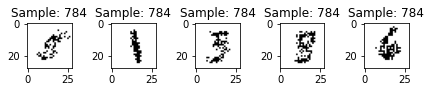

In [ ]:
# 来跑一下
def main():

  global disc_z1, disc_z2
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  
  q4()
  return
  q5()
  q6()
  q7()

  return

if __name__== '__main__':

  main()

### Q5


5. (5 points) For each possible value of
$$
\left(\bar{z}_1, \bar{z}_2\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\},
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_1, Z_2=\left(\bar{z}_1, \bar{z}_2\right)\right]$. This is the expected image corresponding to each possible value of the latent variables $Z_1, Z_2$. Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_1$ and $Z_2$ respectively. What is the intuitive role of the $Z_1, Z_2$ variables in this model?


先来实现一下基础的函数：

In [7]:
# 这俩应该是上一个问题实现的，但是我忘了-.-
def get_p_x_cond_z1_z2(z1_val, z2_val):
  '''
  TODO
  '''
  px = np.array([])

  for i in range(784):
    px = np.append(px, get_p_xk_cond_z1_z2(z1_val, z2_val, i))
  return 1 - px # 为了变白 
  

def get_pixels_sampled_from_p_x_joint_z1_z2(): 
  '''
  TODO. Note that this function should only return the sampled values of pixel variables.
  '''

  z1 = sampleZ(bayes_net['prior_z1'])
  z2 = sampleZ(bayes_net['prior_z2'])
  px = get_p_x_cond_z1_z2(z1, z2)
  fig = np.array([])
  for i in range(784):
    fig = np.append(fig, sampleBinary(px[i]))

  return fig



In [ ]:
def get_conditional_expectation():
  '''
  TODO
  '''
  figs = np.array([[]])
  for z1 in disc_z1:
    for z2 in disc_z2:
      figs = np.append(figs, get_p_x_cond_z1_z2(z1,z2))

  return figs.reshape(625,784)      


In [ ]:
def q5():
  '''
  Plots the expected images for each latent configuration on a 2D grid. Rest is TODO.
  '''
  canvas = np.empty((28 * len(disc_z1), 28 * len(disc_z2)))
  figs = get_conditional_expectation()
  for i, z1_val in enumerate(disc_z1):
    for j, z2_val in enumerate(disc_z2):
      canvas[(len(disc_z1) - i - 1) * 28:(len(disc_z2) - i) * 28, j * 28:(j + 1) * 28] = \
    	figs[i * n_disc_z + j].reshape(28, 28)
  plt.figure(figsize=(4,3),dpi=200)
  plt.imshow(canvas, cmap='gray')
  plt.tight_layout()
  plt.savefig('a5', bbox_inches='tight')
  plt.show()
  plt.close()

  return

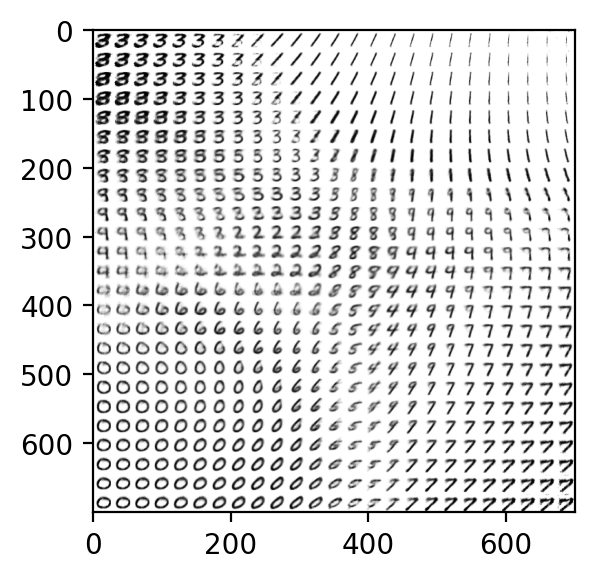

In [ ]:
# 来跑一下
def main():

  global disc_z1, disc_z2
  global n_disc_z 
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  
  # q4()
  q5()
  return
  q6()
  q7()

  return

if __name__== '__main__':

  main()

### Q6
6. (10 points) In $\mathrm{q} 6$. mat, you are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_1} \sum_{z_2} p\left(z_1, z_2, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted".
Hint: If you run into any flow issues, search for the "log-sum-exp trick" online for help.


昨晚玩大表哥2结果把后面两题鸽了~，第二天起来再做完吧-。-

这题是在validation集里求marginal distribution，然后套一个log likelihoood，这样得到的值的集合就叫做average marginal log likelihood，算一下这些值的标准差，利用3-σ原则判断test集分类错误的点。可能会用到log sum的trick，记的鱼书里好像有介绍。

记录一下思考的点：$p(x_1,...,x_{784}) = \sum_{z_1}\sum_{z_2} p(z_1z_2)p(x_1|z_1z_2)...p(x_{784}|z_1z_2)$，我们有的是$[p(x_1|z_1z_2),...,p(x_{784}|z_1z_2)]$这个matrix，如果对于validation集里1w张图片的每个像素点都进行loop去求对应的marginal distribution的话，就需要10000 \* 784 \* 25 \*25这么多次计算，唔上亿次运算了，但这些运算都是至少必须的，实际上如果直接暴力循环+乘法会算不出来的（Q7试过勒）。

优化：先把$p(z_1z_2)$和$p(x_i|z_1z_2)$，也就是先验概率和条件概率求出来，能用numpy运算就用，像sum之类的，不要用for loop，这个原因在Q7有说，还要把概率的乘法用LSE变成log的加法 :)

接下来介绍LSE，这块之前只是看鱼书有点了解，这下稍微深入一些：

log-sum-trick：

1. LSE trick是解决LSE中的什么问题：
https://zhuanlan.zhihu.com/p/91112507 https://leimao.github.io/blog/LogSumExp/
2. LSE、Softmax、max的联系：
https://zhuanlan.zhihu.com/p/153535799
3. Naive Bayes中的LSE trick：https://stats.stackexchange.com/a/253319/363445
4. http://wittawat.com/posts/log-sum_exp_underflow.html

当时我是先做Q7的，结果发现如果直接去用for loop算概率的话会很慢，根本算不出来，然后就去查资料，发现LSE会加速概率的计算，下面的picture算是对这部分的总结吧 :)

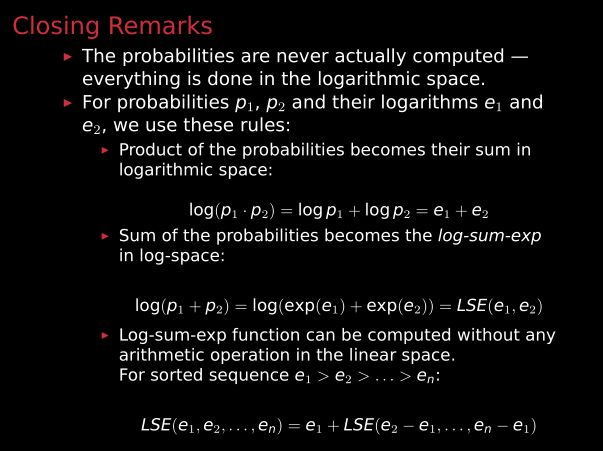

In [19]:
# 按照Stanford佬的格式来写了：
import math
from tqdm import tqdm
def probCalculation(image, prob):
  # prob是vector的形式
  mask = image.astype(bool)
  # return的是conditional的连乘log之和
  return (np.sum(np.log(np.select([mask, np.invert(mask)], [1. - prob, prob]))))
  

def fastLogProb(image, probs, priors):

  log_joint = np.array([])
  # 利用LSE trick
  for i, prob in enumerate(probs):
    # 先算joint，也就是连乘的部分
    log_joint = np.append(log_joint, probCalculation(image, prob) + math.log(priors[i]))

  a = max(log_joint)


  return math.log(np.exp(log_joint - a).sum()) + a 



def q6():
  '''
  Loads the data and plots the histograms. Rest is TODO.
  '''

  mat = loadmat('q6.mat')
  val_data = mat['val_x']
  test_data = mat['test_x']
  real_marginal_log_likelihood = []
  corrupt_marginal_log_likelihood = []

  probs = np.empty([625, 28 * 28])
  priors = np.empty([625])
  counter = 0

  for z1 in disc_z1:
    for z2 in disc_z2:
      probs[counter] = get_p_x_cond_z1_z2(z1, z2)
      priors[counter] = get_p_z1(z1) * get_p_z2(z2)
      counter = counter + 1

  validation = np.empty([val_data.shape[0]])

  print("Starting validation")

  for i, image in tqdm(enumerate(val_data)):
    validation[i] = fastLogProb(image, probs, priors)
    if i % 1000 == 0:
     print(i)

  std = np.std(validation)
  mean = np.mean(validation)
  low = mean - 3 * std
  high = mean + 3 * std
  LOW = -650.


  for i, image in tqdm(enumerate(test_data)):
    prob = fastLogProb(image, probs, priors)


    if prob > low and prob < high:
      real_marginal_log_likelihood.append(prob)
    else:
      corrupt_marginal_log_likelihood.append(prob)
  
  '''
  TODO
  '''
  
  plot_histogram(real_marginal_log_likelihood, title='Histogram of marginal log-likelihood for real data',
       xlabel='marginal log-likelihood', savefile='a6_hist_real')

  plot_histogram(corrupt_marginal_log_likelihood, title='Histogram of marginal log-likelihood for corrupted data',
    xlabel='marginal log-likelihood', savefile='a6_hist_corrupt')

  return

Starting validation


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
2it [00:00, 11.89it/s]

0


1002it [01:27, 11.53it/s]

1000


2002it [02:56, 11.05it/s]

2000


3002it [04:23, 11.76it/s]

3000


4002it [05:52,  6.77it/s]

4000


5003it [07:20, 11.48it/s]

5000


6003it [08:47, 11.46it/s]

6000


7003it [10:16, 11.33it/s]

7000


8003it [11:43, 11.41it/s]

8000


9003it [13:10, 11.57it/s]

9000


10000it [14:39, 11.37it/s]
20000it [30:04, 11.08it/s]


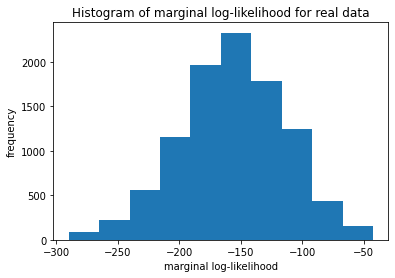

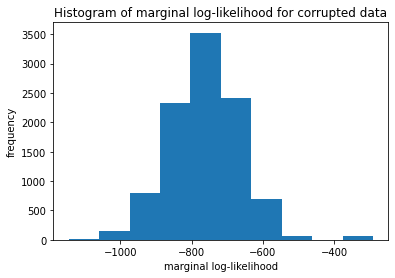

In [39]:
# 来跑一下
def main():

  global disc_z1, disc_z2
  global n_disc_z
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  
  # q4()
  # q5()
  q6()
  return
  q7()

  return

if __name__== '__main__':

  main()

### Q7
7. (7 points) In q7.mat, you are given a labeled dataset of images of handwritten digits (the label corresponds to the digit identity). For each image $I^k$, compute the conditional probabilities $p\left(\left(Z_1, Z_2\right)=\left(\bar{z}_1, \bar{z}_2\right) \mid X_{1: 784}=I^k\right)$. Use these probabilities to compute the conditional expectation
$$
\left.E\left[\left(Z_1, Z_2\right) \mid X_{1: 784}=I^k\right)\right]
$$
Plot all the conditional expectations in a single plot, color coding each point as per their label. What is the relationship with the figure you produced for part 5 ?

$\left.E [ Z_1 \mid X_{1: 784}=I^k \right] =\sum_{z_1} z_1 \sum_{z_2} {P(z_1,z_2,X_{1: 784} )\over P(X_{1: 784} )} $，其中$P(X_{1: 784})$可以写成$\sum_{z_1} \sum_{z_2} P(X_{1: 784}| z_1, z_2)$

但这里题目的意思是只要用平均的概率就好了，其实就是简化了计算，没简化的情况我也跑了一下，就是比简化过的慢上了大概30倍。

实际上也就是说$p(z_1|X)$和$p(z_2|X)$都用$p(z_1,z_2|X)$就好了 :)

求一下条件期望，然后把点和label画出来。

In [56]:
from tqdm import tqdm
def get_conditional_expectation(data):
  '''
  TODO
  '''
  # 最后得到的应该是1000个(z1,z2)的值
  mean_z1 = np.array([])
  mean_z2 = np.array([])
  # 先求z1的
  for fig in tqdm(data):
    z1_mean = 0
    for z1 in disc_z1:
      z1_con = 0
      for z2 in disc_z2:
        z1_con += get_joint_distribution(z1,z2,fig) / get_x_marginal(fig)
      z1_mean += z1_con * z1
    mean_z1 = np.append(mean_z1, z1_mean)
    

    # 先求z1的
  for fig in tqdm(data):
    z2_mean = 0
    for z2 in disc_z2:
      z2_con = 0
      for z1 in disc_z1:
        z2_con += get_joint_distribution(z1,z2,fig) / get_x_marginal(fig)
      z2_mean += z2_con * z2
    mean_z2 = np.append(mean_z2, z2_mean)
  


  return mean_z1, mean_z2      


In [68]:
from matplotlib import cm

def q7():
  '''
  Loads the data and plots a color coded clustering of the conditional expectations. Rest is TODO.
  '''

  mat = loadmat('q7.mat')
  data = np.array(mat['x']) # 1000 x 784
  labels = np.array(mat['y']) # 1000 x 1
  

  mean_z1, mean_z2 = get_conditional_expectation(data)

  plt.figure(figsize=(4,3),dpi=200)
  plt.scatter(mean_z1, mean_z2, s = 5, c=labels, cmap=plt.cm.Spectral)
  plt.colorbar()
  plt.grid()
  plt.savefig('a7', bbox_inches='tight')
  plt.show()
  plt.close()


  
  return

In [ ]:
# 来跑一下
def main():

  global disc_z1, disc_z2
  global n_disc_z
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  
  # q4()
  # q5()
  # q6()
  q7()
  return

if __name__== '__main__':

  main()

但其实跑完才发现，这样是很慢的，基本上不可能跑完，所以要对概率的求解进行优化。

优化：
1. 把向量or矩阵循环求和换成numpy的操作，原因：[link](https://www.zhihu.com/question/67310504/answer/252179088)

2. 把概率的连乘换成log相加

In [59]:
def get_joint_distribution(fig, z1, z2):
  # input: X_1:784 = fig

  return probCalculation(fig, get_p_x_cond_z1_z2(z1,z2)) + math.log(get_p_z1(z1)*get_p_z2(z2))

In [65]:
from tqdm import tqdm
def get_conditional_expectation(data):
  '''
  TODO
  '''

  probs = np.empty([625, 28 * 28])
  priors = np.empty([625])
  counter = 0

  for z1 in disc_z1:
    for z2 in disc_z2:
      probs[counter] = get_p_x_cond_z1_z2(z1, z2)
      priors[counter] = get_p_z1(z1) * get_p_z2(z2)
      counter = counter + 1


  # # 最后得到的应该是1000个(z1,z2)的值
  mean_z1 = np.array([])
  mean_z2 = np.array([])
  # 先求z1的
  for fig in tqdm(data):
    z1_mean = 0
    z2_mean = 0
    z_con = 0
    count = 0
    marginal_p = fastLogProb(fig, probs,priors)
    for z1 in disc_z1:
      for z2 in disc_z2:
        z_con = math.exp(probCalculation(fig, probs[count]) + math.log(priors[count]) - marginal_p )
        z1_mean += z_con * z1
        z2_mean += z_con * z2
        count+=1
    
    
    mean_z1 = np.append(mean_z1, z1_mean )
    mean_z2 = np.append(mean_z2, z2_mean )

  return mean_z1, mean_z2      


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
100%|██████████| 1000/1000 [02:35<00:00,  6.45it/s]


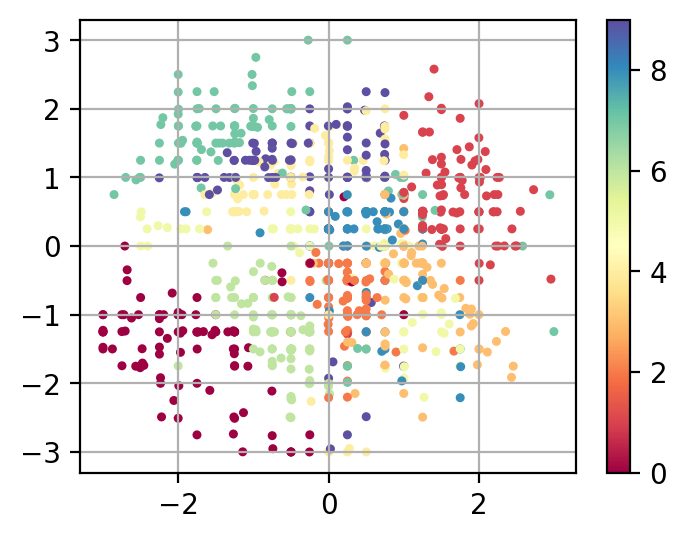

In [69]:
# 来跑一下
def main():

  global disc_z1, disc_z2
  global n_disc_z
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  
  # q4()
  # q5()
  # q6()
  q7()
  return
from matplotlib import cm

if __name__== '__main__':

  main()